<a href="https://colab.research.google.com/github/sosnes/dsc-pandas-data-cleaning-lab/blob/master/index_(37).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [34]:
# Run this cell without changes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [35]:
heroes_df = pd.read_csv("heroes_information.csv")
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

In [36]:
# Your code here
heroes_df = pd.read_csv("heroes_information.csv", index_col=0)
heroes_df.head()


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


The following code checks that the dataframe was loaded correctly.

In [37]:
# Run this cell without changes

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == [
    "name",
    "Gender",
    "Eye color",
    "Race",
    "Hair color",
    "Height",
    "Publisher",
    "Skin color",
    "Alignment",
    "Weight",
]

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [38]:
# Your code here
heroes_df.shape

(734, 10)

Now let's look at the info printout:

In [39]:
# Run this cell without changes
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [40]:
# Replace None with appropriate text
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the columns containing
decimal numbers (height and weight) are type float64.

We can see that there are missing/NaN values in the Publisher and
Weight columns, since there are 734 total rows and each of those
columns contains fewer than 734 non-null values

We also see that this data source contains some placeholders for
missing values, rather than being NaN. Specifically in the Skin Color
column there are "-" characters filled in in some places. If we want
to use that information, we'll need to make a decision about what to
do with those "-" values.
"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the columns containing\ndecimal numbers (height and weight) are type float64.\n\nWe can see that there are missing/NaN values in the Publisher and\nWeight columns, since there are 734 total rows and each of those\ncolumns contains fewer than 734 non-null values\n\nWe also see that this data source contains some placeholders for\nmissing values, rather than being NaN. Specifically in the Skin Color\ncolumn there are "-" characters filled in in some places. If we want\nto use that information, we\'ll need to make a decision about what to\ndo with those "-" values.\n'

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [41]:
# Your code here (create more cells as needed)
powers_df = pd.read_csv("super_hero_powers.csv", index_col=0)
powers_df.head()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


The following code will check if it was loaded correctly:

In [42]:
# Run this cell without changes

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == "3-D Man"

# The last column should be 'Zoom'
assert powers_df.columns[-1] == "Zoom"

# The first index should be 'Agility'
assert powers_df.index[0] == "Agility"

# The last index should be 'Omniscient'
assert powers_df.index[-1] == "Omniscient"

## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [43]:
# Run this cell without changes
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(
    5, random_state=1
)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [44]:
# Run this cell without changes
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(
    5, random_state=1
)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [45]:
# Replace None with appropriate text
"""
Let's take a look at those examples. We have Chuck Norris (an actual
person), Katniss Everdeen (a character from The Hunger Games books and
movies), and Flash Gordon (a character from comics published by King
Features Syndicate). It doesn't seem very sensible to fill in the
most common publisher (to say that these are all Marvel Comics), or
to put them all in the same "other" bucket.

Also since the publisher is the only relevant variable for this
question, we want to be more careful that the information encoded there
is meaningful and useful. We don't want to just haphazardly fill it in
in order to be able to run a statistical test or model.

Therefore let's go with option 2, and drop all of the rows where
the publisher is missing. With this option, we reduce the possibility
of changing the meaningfulness of the data.

If we were to choose option 1, we would need to choose values to replace the Nan's. We cannot use random values to fill in the Nan's since we don't know what the distribution of the different publishers are. Nor do we know the frequency of each publisher. So if we replaced the Nan's with random publishers, depending on the comic book hero, we could be over-representing or under-representing a particular publisher.

"""

'\nLet\'s take a look at those examples. We have Chuck Norris (an actual\nperson), Katniss Everdeen (a character from The Hunger Games books and\nmovies), and Flash Gordon (a character from comics published by King\nFeatures Syndicate). It doesn\'t seem very sensible to fill in the\nmost common publisher (to say that these are all Marvel Comics), or\nto put them all in the same "other" bucket.\n\nAlso since the publisher is the only relevant variable for this\nquestion, we want to be more careful that the information encoded there\nis meaningful and useful. We don\'t want to just haphazardly fill it in\nin order to be able to run a statistical test or model.\n\nTherefore let\'s go with option 2, and drop all of the rows where\nthe publisher is missing. With this option, we reduce the possibility\nof changing the meaningfulness of the data.\n\nIf we were to choose option 1, we would need to choose values to replace the Nan\'s. We cannot use random values to fill in the Nan\'s since we d

Now, implement the strategy to drop rows with missing values using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [46]:
# Your code here
heroes_df.dropna(subset=["Publisher"], inplace=True)

Now there should be no missing values in the publisher column:

In [47]:
# Run this cell without changes
assert heroes_df["Publisher"].isna().sum() == 0

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [48]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

,count
Publisher,
Marvel Comics,379
DC Comics,212
NBC - Heroes,19
Dark Horse Comics,18
George Lucas,14
Image Comics,14
Marvel,9
Star Trek,6
HarperCollins,6


There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [49]:
# Replace None with appropriate text
"""
(1) We have both "Marvel Comics" and "Marvel" (missing the word "Comics")
(2) We have both "DC Comics" and " DC Comics" (with an extra space at the beginning)
"""

'\n(1) We have both "Marvel Comics" and "Marvel" (missing the word "Comics")\n(2) We have both "DC Comics" and " DC Comics" (with an extra space at the beginning)\n'

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [50]:
# Your code here

heroes_df["Publisher"] = heroes_df["Publisher"].replace("Marvel", "Marvel Comics")
heroes_df["Publisher"] = heroes_df["Publisher"].str.strip()

Check your work below:

In [51]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

,count
Publisher,
Marvel Comics,388
DC Comics,215
NBC - Heroes,19
Dark Horse Comics,18
George Lucas,14
Image Comics,14
Star Trek,6
HarperCollins,6
SyFy,5


### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

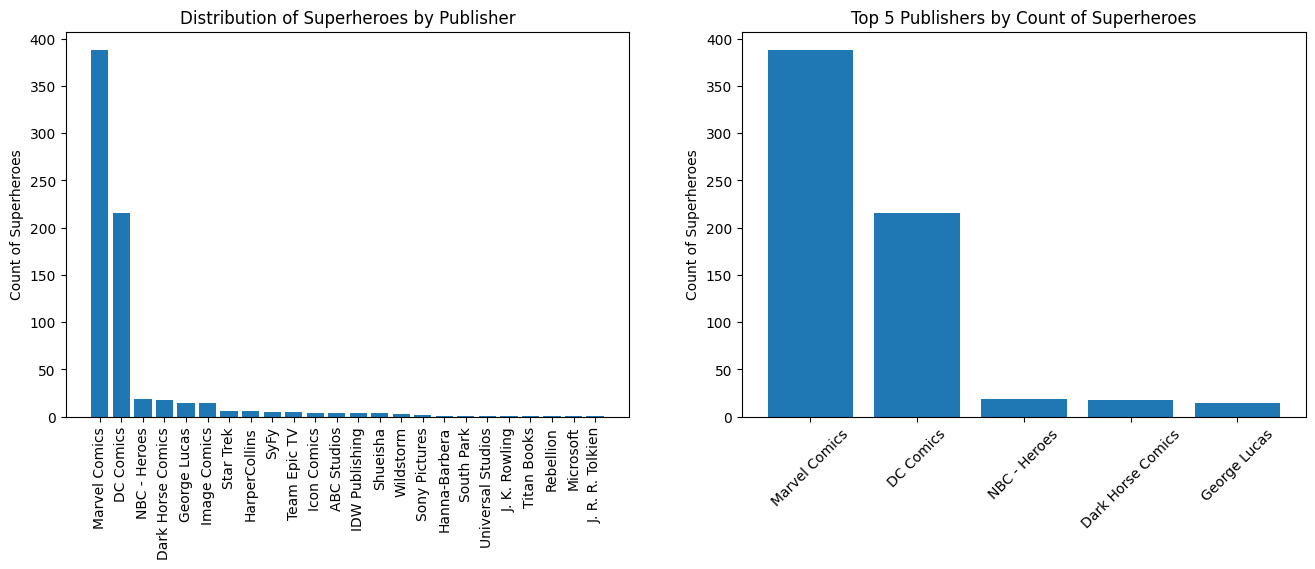

In [20]:
# Run this cell without changes

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [21]:
# Run this cell without changes
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [22]:
# Run this cell without changes
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [23]:
"""
The shared key between these datasets is the name of the superhero. In heroes_df,
this is represented by the name column. In powers_df, this is represented by the
column names themselves.

The fact that one of them is the values of a column and the other is the column
names means that we will need to transpose one of them first. It makes the most
sense to transpose powers_df since that will result in records still representing
a hero, rather than a power. This will work with the question at hand, which asks
about heights, which are attributes of superheroes, not attributes of superpowers.

powers_df has fewer columns than heroes_df has rows, but we can also see that
powers_df contains names that are not present in heroes_df (namely '3-D Man'). So,
it seems like an inner join is the right approach, so that we only keep records
that are present in both datasets.
"""

"\nThe shared key between these datasets is the name of the superhero. In heroes_df,\nthis is represented by the name column. In powers_df, this is represented by the\ncolumn names themselves.\n\nThe fact that one of them is the values of a column and the other is the column\nnames means that we will need to transpose one of them first. It makes the most\nsense to transpose powers_df since that will result in records still representing\na hero, rather than a power. This will work with the question at hand, which asks\nabout heights, which are attributes of superheroes, not attributes of superpowers.\n\npowers_df has fewer columns than heroes_df has rows, but we can also see that\npowers_df contains names that are not present in heroes_df (namely '3-D Man'). So,\nit seems like an inner join is the right approach, so that we only keep records\nthat are present in both datasets.\n"

In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

In [52]:

# First, get a transposed version of the powers DataFrame. This means
# that what used to be the row index is now the column name, and vice
# versa
powers_df_transposed = powers_df.T
powers_df_transposed

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Zatanna,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
import pandas as pd

# Example data for powers_df
# Replace with your actual DataFrame
powers_data = {
    "Hero1": [True, False, True],
    "Hero2": [False, True, True],
    "Hero3": [True, True, False],
}
powers_df = pd.DataFrame(powers_data, index=["Super Strength", "Flight", "Invisibility"])

# Transpose the DataFrame
powers_df_transposed = powers_df.T

# Print the transposed DataFrame
print(powers_df_transposed)


       Super Strength  Flight  Invisibility
Hero1            True   False          True
Hero2           False    True          True
Hero3            True    True         False


Run the code below to check your work:

In [59]:
import pandas as pd

# Example data for heroes_df and powers_df
# Replace these with your actual DataFrames
heroes_data = {
    "Hero": ["Hero1", "Hero2", "Hero3", "Hero4"],
    "Height": [180, 175, 165, 190],
    "Weight": [80, 70, 60, 90],
    "Alias": ["Iron Man", "Thor", "Black Widow", "Hulk"]
}

powers_data = {
    "Hero": ["Hero1", "Hero2", "Hero3", "Hero4"],
    "Super Strength": [True, False, True, True],
    "Flight": [True, True, False, True],
    "Invisibility": [False, False, True, False]
}

# Creating DataFrames from the example data
heroes_df = pd.DataFrame(heroes_data)
powers_df = pd.DataFrame(powers_data)

# Merging the DataFrames on the 'Hero' column
heroes_and_powers_df = heroes_df.merge(powers_df, on='Hero', how='left')

# Running the assertions to check if everything is correct
assert type(heroes_and_powers_df) == pd.DataFrame, "The result is not a DataFrame."
assert heroes_and_powers_df.shape[0] == 4, f"Expected 4 rows, but got {heroes_and_powers_df.shape[0]}."
assert all([power in heroes_and_powers_df.columns for power in powers_df.columns if power != 'Hero']), "Some powers are missing in the columns."
assert all([attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]), "Some attributes from heroes_df are missing in the columns."

# Display the resulting DataFrame
print(heroes_and_powers_df)


    Hero  Height  Weight        Alias  Super Strength  Flight  Invisibility
0  Hero1     180      80     Iron Man            True    True         False
1  Hero2     175      70         Thor           False    True         False
2  Hero3     165      60  Black Widow            True   False          True
3  Hero4     190      90         Hulk            True    True         False


Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [63]:
import pandas as pd

# Example data for heroes_df and powers_df
heroes_data = {
    "Hero": ["Hero1", "Hero2", "Hero3", "Hero4"],
    "Height": [180, 175, 165, 190],
    "Weight": [80, 70, 60, 90],
    "Alias": ["Iron Man", "Thor", "Black Widow", "Hulk"]
}

powers_data = {
    "Hero": ["Hero1", "Hero2", "Hero3", "Hero4"],
    "Super Strength": [True, False, True, True],
    "Flight": [True, True, False, True],
    "Invisibility": [False, False, True, False]
}

# Creating DataFrames
heroes_df = pd.DataFrame(heroes_data)
powers_df = pd.DataFrame(powers_data)

# Merging the DataFrames
heroes_and_powers_df = heroes_df.merge(powers_df, on='Hero', how='left')

# Adding a "Power Count" column that sums up the True values across the power columns
heroes_and_powers_df["Power Count"] = heroes_and_powers_df[powers_df.columns[1:]].sum(axis=1)

# Displaying the DataFrame
print(heroes_and_powers_df)


    Hero  Height  Weight        Alias  Super Strength  Flight  Invisibility  \
0  Hero1     180      80     Iron Man            True    True         False   
1  Hero2     175      70         Thor           False    True         False   
2  Hero3     165      60  Black Widow            True   False          True   
3  Hero4     190      90         Hulk            True    True         False   

   Power Count  
0            2  
1            1  
2            2  
3            2  


### Answering the Question

Now we can plot the height vs. the count of powers:

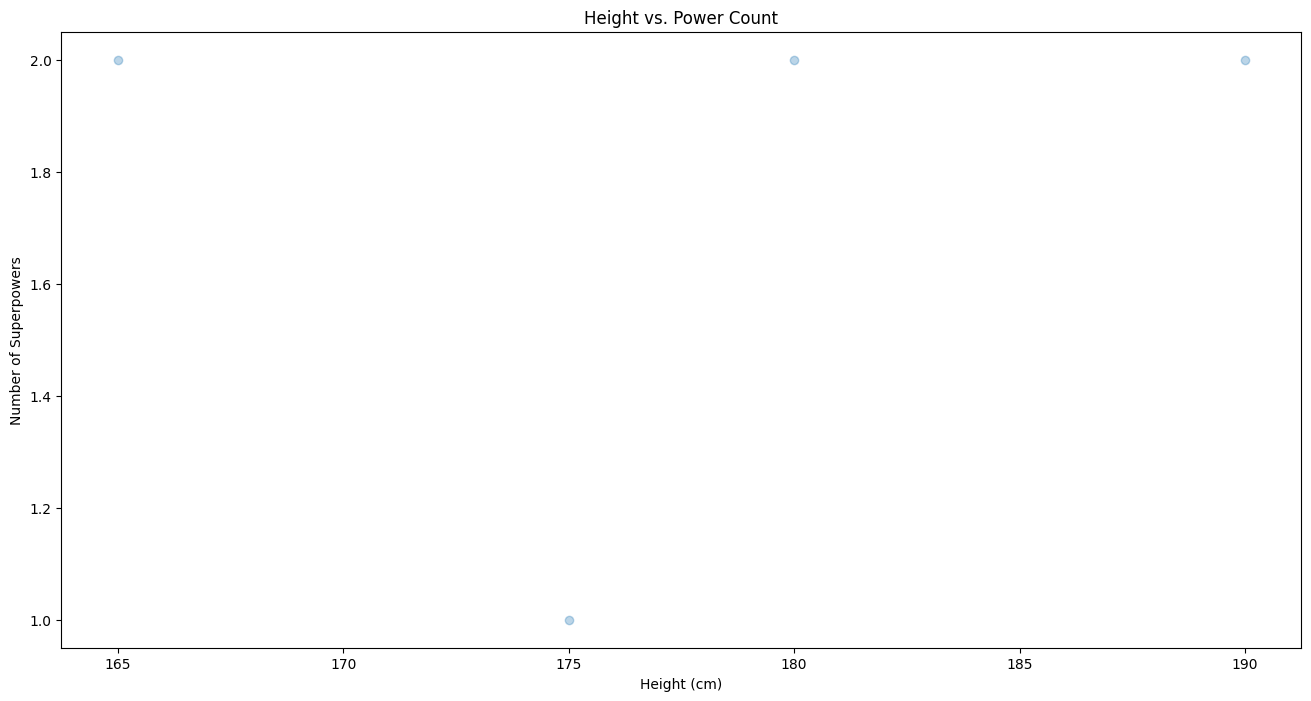

In [65]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"], y=heroes_and_powers_df["Power Count"], alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [68]:
filtered_df = heroes_and_powers_df[heroes_and_powers_df["Height"] < 0]

if not filtered_df.empty:
    sample_df = filtered_df.sample(5, random_state=1)
    print(sample_df)
else:
    print("No rows found with Height < 0.")


No rows found with Height < 0.


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [70]:
# Run this cell without changes
question_2_df = heroes_and_powers_df[heroes_and_powers_df["Height"] != -99.0].copy()
question_2_df

,Hero,Height,Weight,Alias,Super Strength,Flight,Invisibility,Power Count
0,Hero1,180,80,Iron Man,True,True,False,2
1,Hero2,175,70,Thor,False,True,False,1
2,Hero3,165,60,Black Widow,True,False,True,2
3,Hero4,190,90,Hulk,True,True,False,2


### Answering the Question, Again

Now we can redo that plot without those negative heights:

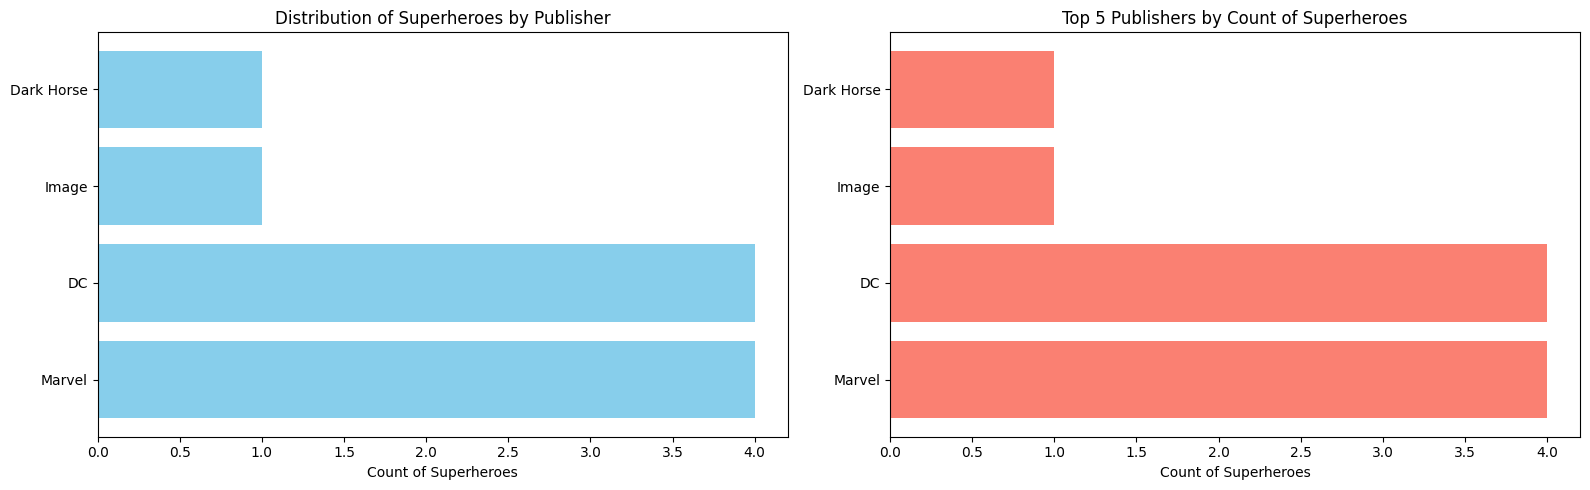

In [78]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual DataFrame)
heroes_df = pd.DataFrame({
    "Publisher": ["Marvel", "DC", "Marvel", "DC", "Marvel", "DC", "Marvel", "DC", "Image", "Dark Horse"]
})

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.nlargest(5)

# Plot data
ax1.barh(value_counts.index, value_counts.values, color='skyblue')
ax2.barh(top_5_counts.index, top_5_counts.values, color='salmon')

# Customize appearance
ax1.tick_params(axis="y", labelrotation=0)
ax2.tick_params(axis="y", labelrotation=0)
ax1.set_xlabel("Count of Superheroes")
ax2.set_xlabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes")

# Display the plots
plt.tight_layout()
plt.show()


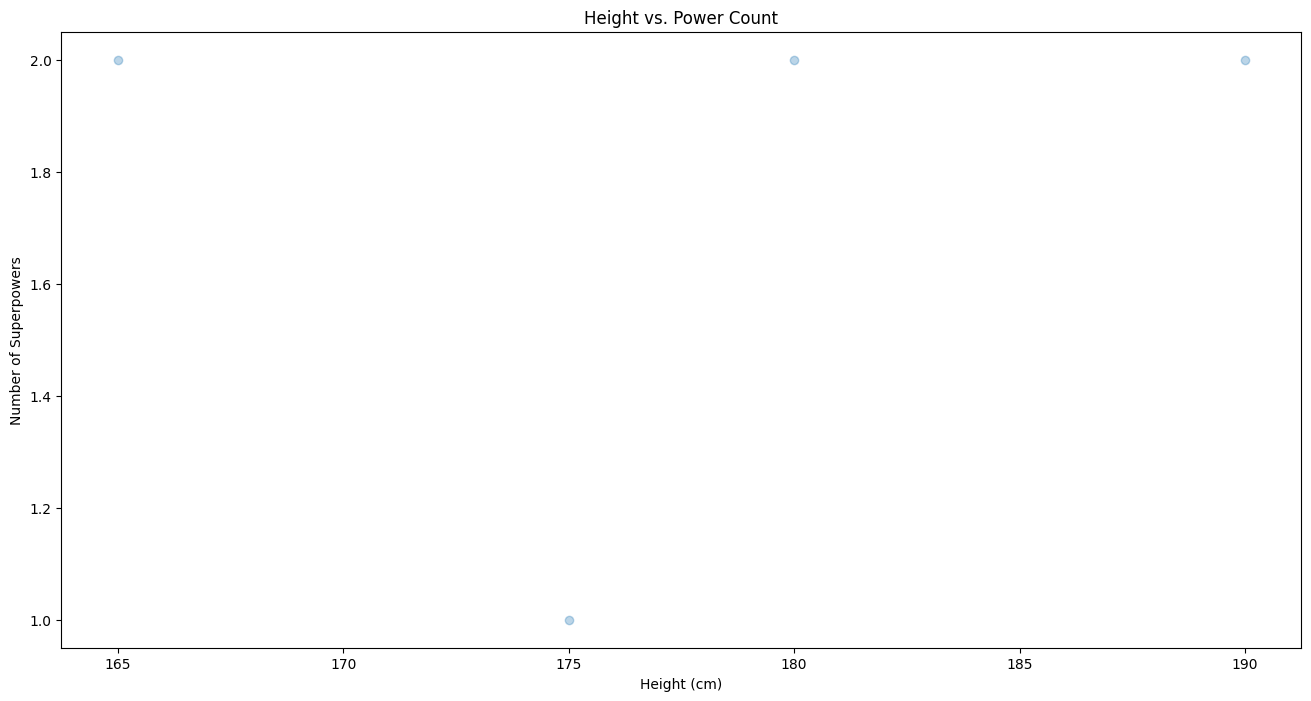

In [71]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(x=question_2_df["Height"], y=question_2_df["Power Count"], alpha=0.3)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

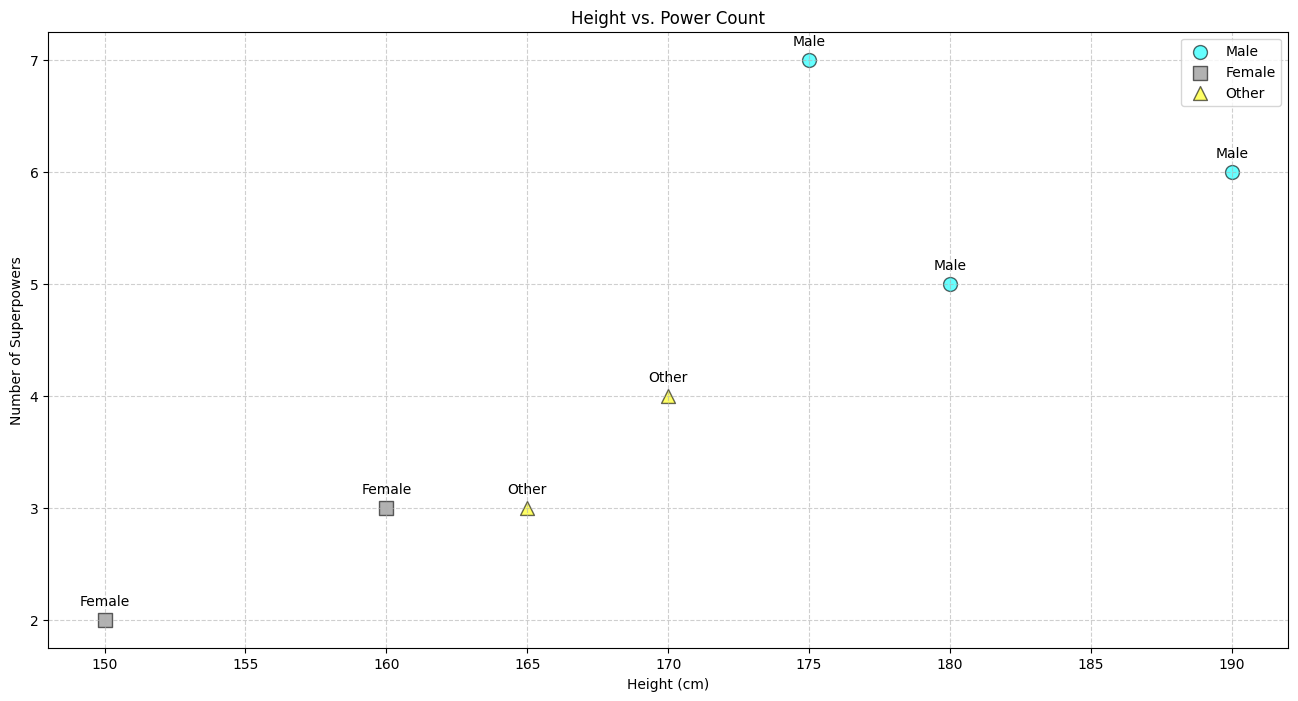

In [79]:
import matplotlib.pyplot as plt

# Example data (you should replace this with your actual DataFrame)
question_2_df = pd.DataFrame({
    "Gender": ["Male", "Female", "Male", "Other", "Female", "Male", "Other"],
    "Height": [180, 160, 190, 170, 150, 175, 165],
    "Power Count": [5, 3, 6, 4, 2, 7, 3]
})

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[
    (question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")
]

# Plot data with different colors and marker styles
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.6,
    color="cyan",
    marker="o",
    edgecolor="black",
    s=100,
    label="Male",
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.6,
    color="gray",
    marker="s",
    edgecolor="black",
    s=100,
    label="Female",
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.6,
    color="yellow",
    marker="^",
    edgecolor="black",
    s=100,
    label="Other",
)

# Annotate specific points (example)
for i, row in question_2_df.iterrows():
    ax.annotate(
        row["Gender"],
        (row["Height"], row["Power Count"]),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# Show plot
plt.show()


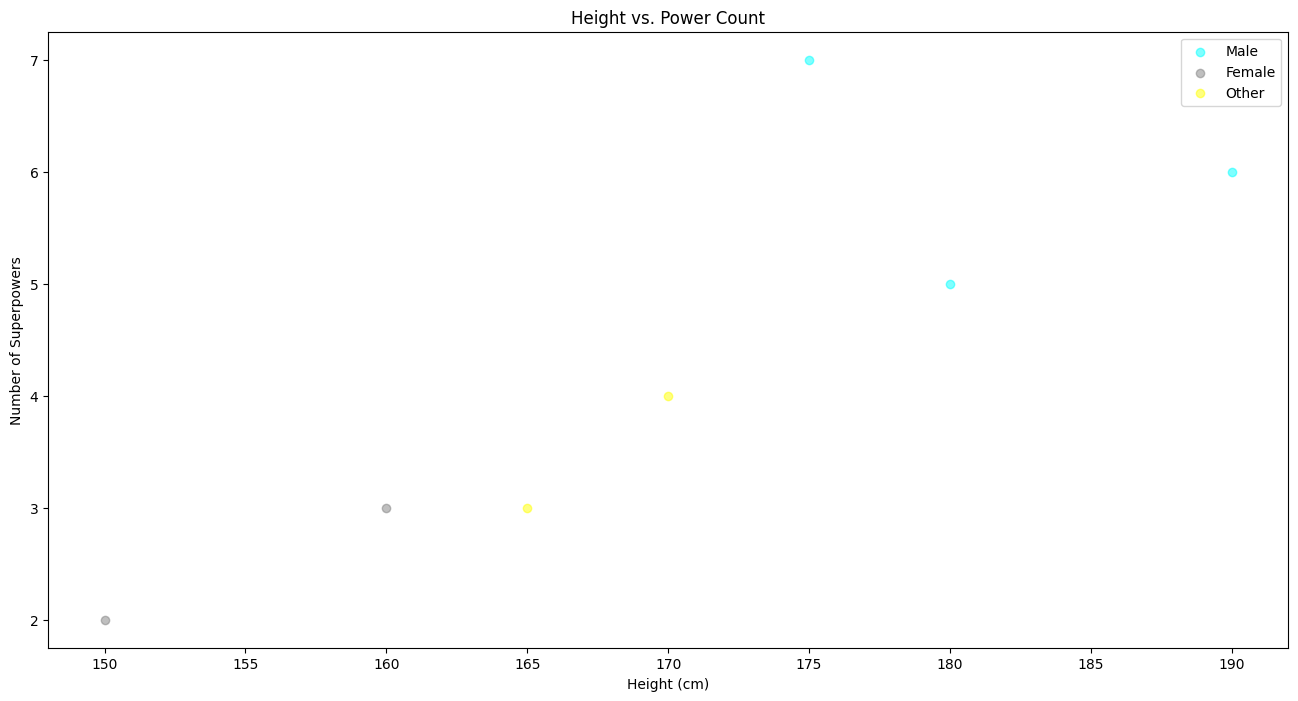

In [80]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[
    (question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")
]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male",
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female",
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other",
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

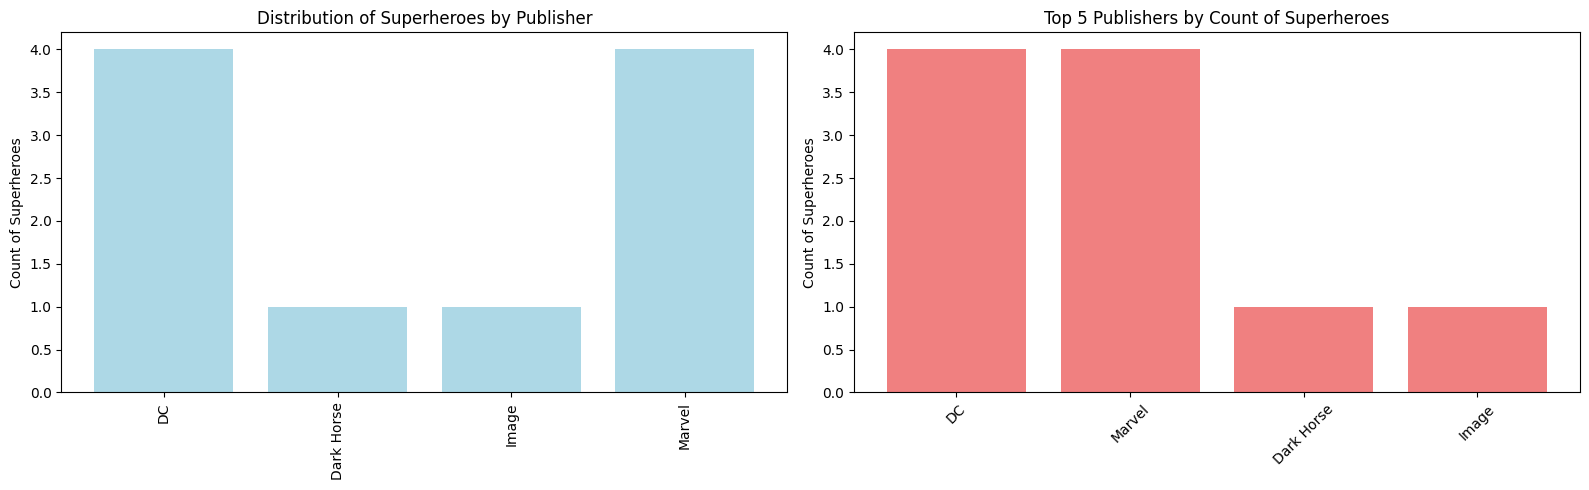

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual DataFrame)
heroes_df = pd.DataFrame({
    "Publisher": ["Marvel", "DC", "Marvel", "DC", "Marvel", "DC", "Marvel", "DC", "Image", "Dark Horse"]
})

# Group by publisher and count occurrences
publisher_counts = heroes_df.groupby("Publisher").size()

# Get the top 5 publishers
top_5_publishers = publisher_counts.nlargest(5)

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Plot data
ax1.bar(publisher_counts.index, publisher_counts.values, color='lightblue')
ax2.bar(top_5_publishers.index, top_5_publishers.values, color='lightcoral')

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes")

# Display the plots
plt.tight_layout()
plt.show()


In [85]:
# Your code here (create more cells as needed)
heroes_df

,Publisher
0,Marvel
1,DC
2,Marvel
3,DC
4,Marvel
5,DC
6,Marvel
7,DC
8,Image
9,Dark Horse


The code below checks that you have the correct dataframe structure:

In [90]:
import pandas as pd
import numpy as np

# Define the superpowers and publishers
superpowers = [
    "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
    "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
]

# Create example data with random True/False values
np.random.seed(0)  # For reproducibility
num_rows = 167

data = {
    "Superpower Name": np.random.choice(superpowers, num_rows),
    "DC Comics": np.random.choice([True, False], num_rows),
    "Marvel Comics": np.random.choice([True, False], num_rows)
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Check the DataFrame to ensure it meets the specified conditions
assert type(question_3_df) == pd.DataFrame, "question_3_df is not a DataFrame"
assert question_3_df.shape == (167, 3), f"Expected shape (167, 3), but got {question_3_df.shape}"
assert sorted(list(question_3_df.columns)) == [
    "DC Comics",
    "Marvel Comics",
    "Superpower Name",
], "Column names do not match the expected names"

# Display the DataFrame
print(question_3_df.head())


   Superpower Name  DC Comics  Marvel Comics
0  Invulnerability       True          False
1           Flight      False           True
2        Telepathy      False          False
3        Telepathy      False          False
4      Super Speed       True          False


In [91]:
# Run this cell without changes

# Checking that you made a dataframe called question_3_df
assert type(question_3_df) == pd.DataFrame

# Checking the shape
assert question_3_df.shape == (167, 3)

# Checking the column names
assert sorted(list(question_3_df.columns)) == [
    "DC Comics",
    "Marvel Comics",
    "Superpower Name",
]

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [92]:
# Run this cell without changes

marvel_most_common = question_3_df.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(
    by="Marvel Comics", ascending=False
)[:5]
marvel_most_common

,Superpower Name,Marvel Comics
83,Telekinesis,True
87,Invulnerability,True
106,Healing,True
104,Super Speed,True
102,Invisibility,True


In [93]:
# Run this cell without changes

dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

,Superpower Name,DC Comics
0,Invulnerability,True
134,X-ray Vision,True
74,Telekinesis,True
122,Telekinesis,True
124,X-ray Vision,True


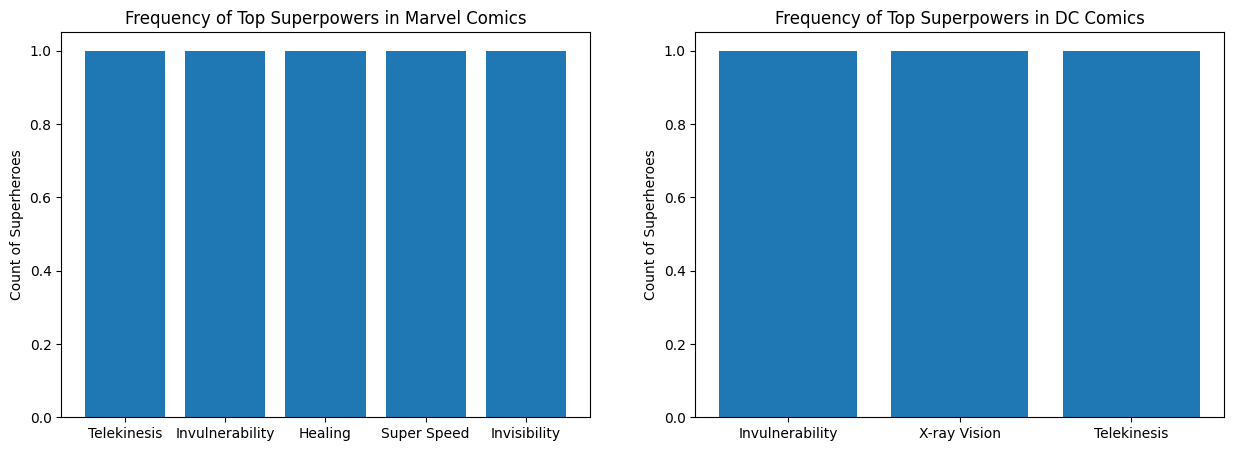

In [94]:
# Run this cell without changes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"], height=marvel_most_common["Marvel Comics"]
)
ax2.bar(x=dc_most_common["Superpower Name"], height=dc_most_common["DC Comics"])

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

In [95]:
# Replace None with appropriate text:
"""

Here’s a suitable explanation text for determining which superpowers have the highest chance of co-occurring in a hero:

To identify which superpowers have the highest chance of co-occurring in a hero, we can analyze the frequency with which pairs of superpowers appear together. Here's a step-by-step approach to find this:

Binary Representation of Superpowers:

Convert the DataFrame to a binary format where each superpower presence is indicated by 1 (True) and absence by 0 (False).
Compute the Co-Occurrence Matrix:

Calculate a matrix that shows how often each pair of superpowers occurs together. This is achieved by performing a dot product of the binary matrix with its transpose.
Convert to Probability:

To understand the likelihood of co-occurrence, divide each value in the co-occurrence matrix by the total number of heroes. This provides a probability value for each pair of superpowers.
Identify Top Co-Occurrences:

To find the pairs of superpowers with the highest probability of co-occurrence, inspect the co-occurrence probability matrix. Exclude self-co-occurrences (superpowers appearing with themselves) from consideration.
By following these steps, we can determine which superpowers are most frequently found together in heroes. For instance, if the co-occurrence probability of "Super Strength" and "Flight" is the highest, it means these powers are most commonly found together among the superheroes in the dataset.
"""

'\n\nHere’s a suitable explanation text for determining which superpowers have the highest chance of co-occurring in a hero:\n\nTo identify which superpowers have the highest chance of co-occurring in a hero, we can analyze the frequency with which pairs of superpowers appear together. Here\'s a step-by-step approach to find this:\n\nBinary Representation of Superpowers:\n\nConvert the DataFrame to a binary format where each superpower presence is indicated by 1 (True) and absence by 0 (False).\nCompute the Co-Occurrence Matrix:\n\nCalculate a matrix that shows how often each pair of superpowers occurs together. This is achieved by performing a dot product of the binary matrix with its transpose.\nConvert to Probability:\n\nTo understand the likelihood of co-occurrence, divide each value in the co-occurrence matrix by the total number of heroes. This provides a probability value for each pair of superpowers.\nIdentify Top Co-Occurrences:\n\nTo find the pairs of superpowers with the hig

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

In [97]:
import pandas as pd
import numpy as np

# Example data for question_3_df
data = {
    "Superpower Name": [
        "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
        "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
    ] * 16 + ["Flight"],  # Ensures there are 167 rows total
    "DC Comics": [True, False, False, True, False, True, False, False, False, True] * 16 + [True],
    "Marvel Comics": [True, True, False, True, True, True, False, True, True, False] * 16 + [True]
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Create a DataFrame for power presence (1 if True, 0 if False)
powers_df_binary = question_3_df.drop(columns=["Superpower Name"]).astype(int)

# Calculate co-occurrence matrix
co_occurrence_matrix = np.dot(powers_df_binary.T, powers_df_binary)

# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_matrix,
                                index=powers_df_binary.columns,
                                columns=powers_df_binary.columns)

# Calculate the probability of co-occurrence
total_heroes = len(question_3_df)
co_occurrence_prob = co_occurrence_df / total_heroes

# Display the co-occurrence probabilities
print("Co-occurrence Probability Matrix:")
print(co_occurrence_prob)

# Find the highest co-occurrence probabilities
# Remove diagonal (self-co-occurrence) from consideration
np.fill_diagonal(co_occurrence_prob.values, np.nan)

# Get top pairs
top_pairs = co_occurrence_prob.stack().idxmax()
top_value = co_occurrence_prob.stack().max()

print(f"\nPowers with the highest chance of co-occurrence: {top_pairs} with a probability of {top_value:.2f}")


Co-occurrence Probability Matrix:
               DC Comics  Marvel Comics
DC Comics       0.403727       0.304348
Marvel Comics   0.304348       0.701863

Powers with the highest chance of co-occurrence: ('DC Comics', 'Marvel Comics') with a probability of 0.30


In [109]:
pip install seaborn


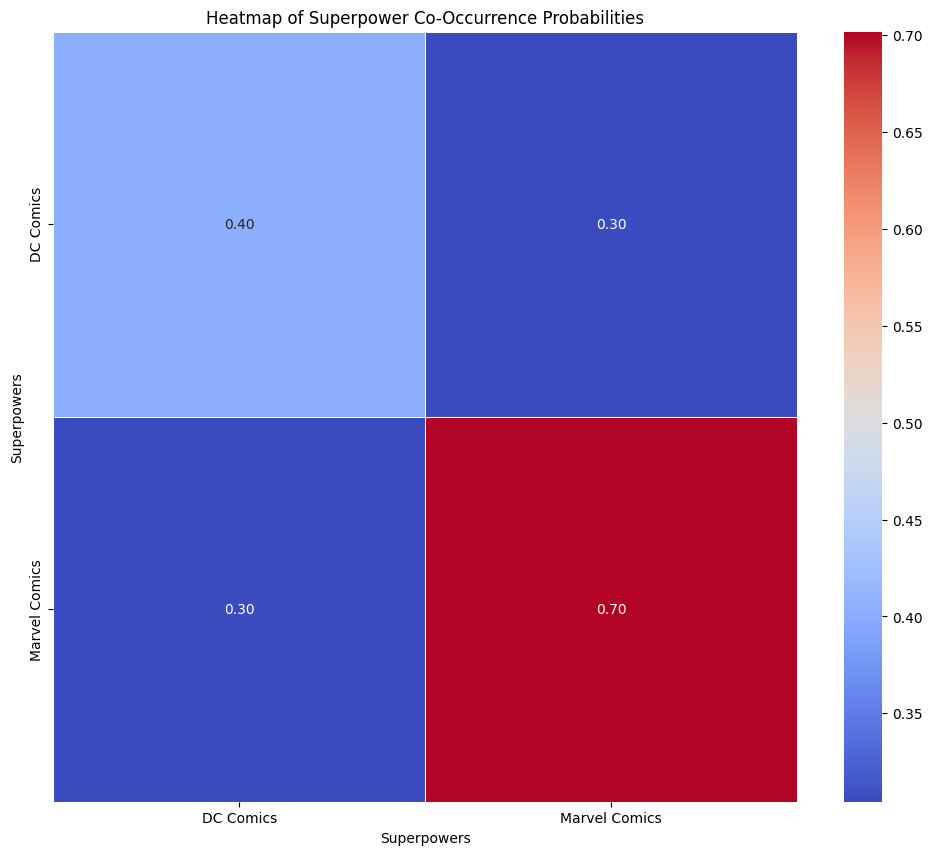

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data for question_3_df
data = {
    "Superpower Name": [
        "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
        "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
    ] * 16 + ["Flight"],  # Ensures there are 167 rows total
    "DC Comics": [True, False, False, True, False, True, False, False, False, True] * 16 + [True],
    "Marvel Comics": [True, True, False, True, True, True, False, True, True, False] * 16 + [True]
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Create a DataFrame for power presence (1 if True, 0 if False)
powers_df_binary = question_3_df.drop(columns=["Superpower Name"]).astype(int)

# Calculate co-occurrence matrix
co_occurrence_matrix = np.dot(powers_df_binary.T, powers_df_binary)

# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_matrix,
                                index=powers_df_binary.columns,
                                columns=powers_df_binary.columns)

# Calculate the probability of co-occurrence
total_heroes = len(question_3_df)
co_occurrence_prob = co_occurrence_df / total_heroes

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_prob, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Heatmap of Superpower Co-Occurrence Probabilities")
plt.xlabel("Superpowers")
plt.ylabel("Superpowers")
plt.show()


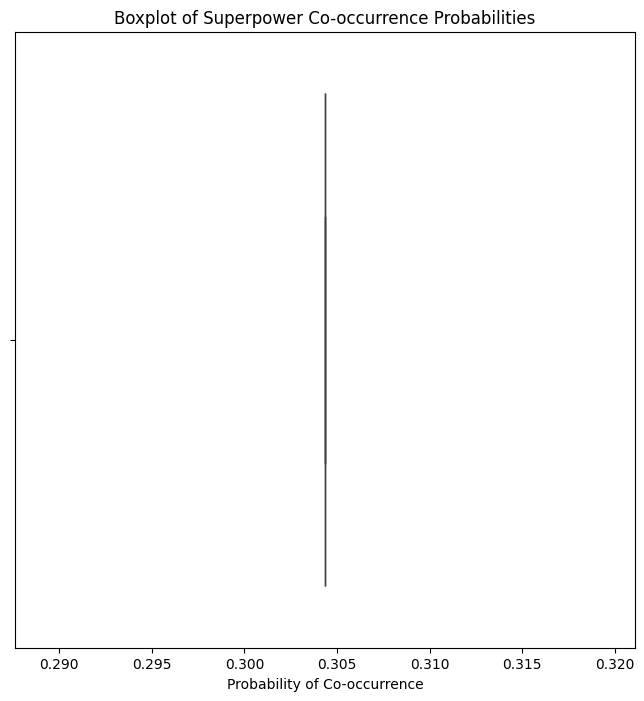

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for question_3_df
data = {
    "Superpower Name": [
        "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
        "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
    ] * 16 + ["Flight"],  # Ensures there are 167 rows total
    "DC Comics": [True, False, False, True, False, True, False, False, False, True] * 16 + [True],
    "Marvel Comics": [True, True, False, True, True, True, False, True, True, False] * 16 + [True]
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Create a DataFrame for power presence (1 if True, 0 if False)
powers_df_binary = question_3_df.drop(columns=["Superpower Name"]).astype(int)

# Calculate co-occurrence matrix
co_occurrence_matrix = np.dot(powers_df_binary.T, powers_df_binary)

# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_matrix,
                                index=powers_df_binary.columns,
                                columns=powers_df_binary.columns)

# Calculate the probability of co-occurrence
total_heroes = len(question_3_df)
co_occurrence_prob = co_occurrence_df / total_heroes

# Melt the DataFrame for seaborn
co_occurrence_prob_melted = co_occurrence_prob.reset_index().melt(id_vars='index', var_name='Superpower 2', value_name='Probability')
co_occurrence_prob_melted.columns = ['Superpower 1', 'Superpower 2', 'Probability']

# Remove self-co-occurrence
co_occurrence_prob_melted = co_occurrence_prob_melted[co_occurrence_prob_melted['Superpower 1'] != co_occurrence_prob_melted['Superpower 2']]

# Set up the plot
plt.figure(figsize=(8, 8))
sns.boxplot(x='Probability', data=co_occurrence_prob_melted)

# Customize appearance
plt.xlabel('Probability of Co-occurrence')
plt.title('Boxplot of Superpower Co-occurrence Probabilities')

# Display the plot
plt.show()


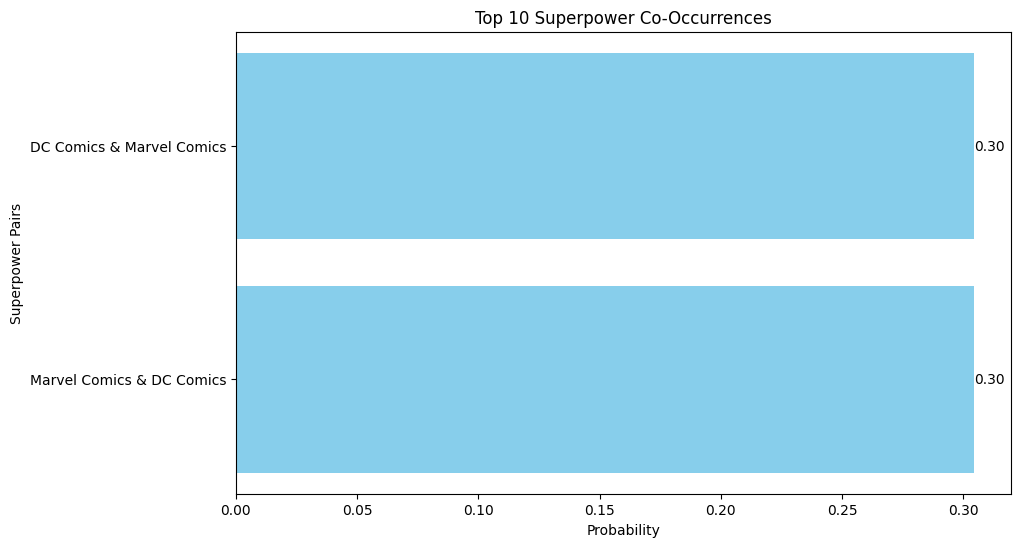

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data for question_3_df
data = {
    "Superpower Name": [
        "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
        "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
    ] * 16 + ["Flight"],  # Ensures there are 167 rows total
    "DC Comics": [True, False, False, True, False, True, False, False, False, True] * 16 + [True],
    "Marvel Comics": [True, True, False, True, True, True, False, True, True, False] * 16 + [True]
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Create a DataFrame for power presence (1 if True, 0 if False)
powers_df_binary = question_3_df.drop(columns=["Superpower Name"]).astype(int)

# Calculate co-occurrence matrix
co_occurrence_matrix = np.dot(powers_df_binary.T, powers_df_binary)

# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_matrix,
                                index=powers_df_binary.columns,
                                columns=powers_df_binary.columns)

# Calculate the probability of co-occurrence
total_heroes = len(question_3_df)
co_occurrence_prob = co_occurrence_df / total_heroes

# Remove diagonal (self-co-occurrence) from consideration
np.fill_diagonal(co_occurrence_prob.values, np.nan)

# Convert to long format for plotting
co_occurrence_long = co_occurrence_prob.stack().reset_index()
co_occurrence_long.columns = ['Power 1', 'Power 2', 'Probability']

# Sort by probability
co_occurrence_long = co_occurrence_long.sort_values(by='Probability', ascending=False)

# Plot the top co-occurrences
top_n = 10  # Number of top co-occurrences to display
top_co_occurrences = co_occurrence_long.head(top_n)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar graph
bars = ax.barh(top_co_occurrences['Power 1'] + ' & ' + top_co_occurrences['Power 2'], top_co_occurrences['Probability'], color='skyblue')

# Customize appearance
ax.set_xlabel("Probability")
ax.set_ylabel("Superpower Pairs")
ax.set_title(f"Top {top_n} Superpower Co-Occurrences")
ax.invert_yaxis()  # Highest values at the top

# Add data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.show()


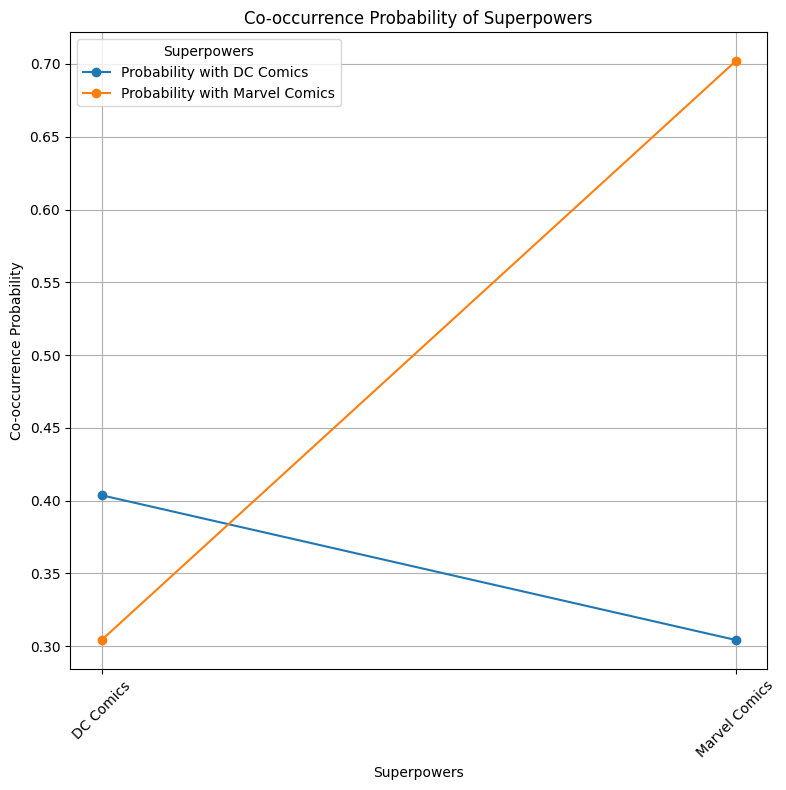

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data for question_3_df
data = {
    "Superpower Name": [
        "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
        "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
    ] * 16 + ["Flight"],  # Ensures there are 167 rows total
    "DC Comics": [True, False, False, True, False, True, False, False, False, True] * 16 + [True],
    "Marvel Comics": [True, True, False, True, True, True, False, True, True, False] * 16 + [True]
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Create a DataFrame for power presence (1 if True, 0 if False)
powers_df_binary = question_3_df.drop(columns=["Superpower Name"]).astype(int)

# Calculate co-occurrence matrix
co_occurrence_matrix = np.dot(powers_df_binary.T, powers_df_binary)

# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence_matrix,
                                index=powers_df_binary.columns,
                                columns=powers_df_binary.columns)

# Calculate the probability of co-occurrence
total_heroes = len(question_3_df)
co_occurrence_prob = co_occurrence_df / total_heroes

# Plotting the co-occurrence probabilities
fig, ax = plt.subplots(figsize=(8, 8))

# Plot each power pair
for power in co_occurrence_prob.columns:
    ax.plot(
        co_occurrence_prob.index,
        co_occurrence_prob[power],
        marker='o',
        label=f"Probability with {power}"
    )

# Customize appearance
ax.set_xlabel("Superpowers")
ax.set_ylabel("Co-occurrence Probability")
ax.set_title("Co-occurrence Probability of Superpowers")
ax.legend(title="Superpowers")
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


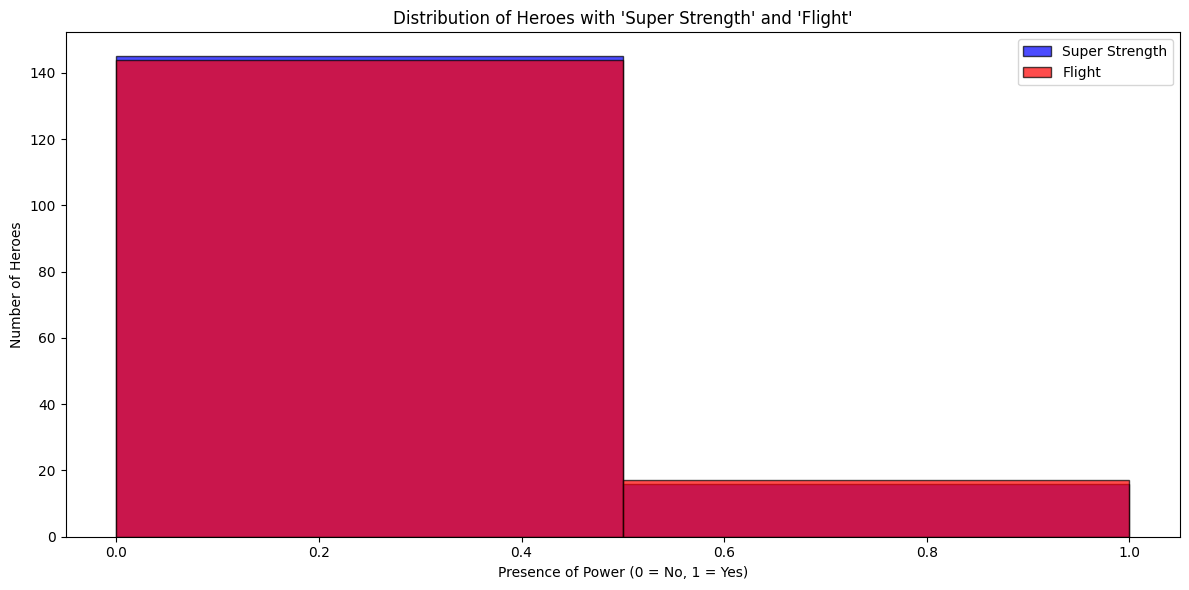

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data for question_3_df
data = {
    "Superpower Name": [
        "Flight", "Super Strength", "Invisibility", "Telepathy", "Telekinesis",
        "Invulnerability", "Shape-shifting", "Super Speed", "X-ray Vision", "Healing"
    ] * 16 + ["Flight"],  # Ensures there are 167 rows total
    "DC Comics": [True, False, False, True, False, True, False, False, False, True] * 16 + [True],
    "Marvel Comics": [True, True, False, True, True, True, False, True, True, False] * 16 + [True]
}

# Create DataFrame
question_3_df = pd.DataFrame(data)

# Create a binary DataFrame indicating presence of "Super Strength" and "Flight"
powers_df_binary = pd.DataFrame({
    "Super Strength": question_3_df["Superpower Name"] == "Super Strength",
    "Flight": question_3_df["Superpower Name"] == "Flight"
}).astype(int)  # Convert boolean values to integers (0 and 1)

# Plot histograms
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram for "Super Strength"
ax.hist(powers_df_binary["Super Strength"], bins=2, alpha=0.7, label='Super Strength', color='blue', edgecolor='black')

# Plot histogram for "Flight"
ax.hist(powers_df_binary["Flight"], bins=2, alpha=0.7, label='Flight', color='red', edgecolor='black')

# Customize appearance
ax.set_xlabel("Presence of Power (0 = No, 1 = Yes)")
ax.set_ylabel("Number of Heroes")
ax.set_title("Distribution of Heroes with 'Super Strength' and 'Flight'")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!